In [143]:
%matplotlib inline 
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
import scipy.stats 
import sklearn.model_selection
from sklearn.model_selection import train_test_split

<img src="./jupyter_logo.png", width=320, heigth=240>

## 刁金龙 11510422 Project2

## Introduction

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around
the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.

This dataset contains the hourly and daily count of rental bikes between years 2011 and
2012 in Capital bikeshare system in Washington, DC with the corresponding weather
and seasonal information.

In [338]:
data_path = 'C:/Users/49732/Desktop/BigDataProjects/project-2/Bike-Sharing-Dataset/'
data_type = ['day','hour']

In [339]:
day_data_file = data_path+data_type[0]+'.csv'
data_file = data_path+data_type[1]+'.csv'

### Data Exploration

datetime - hourly date + timestamp  

season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 

holiday - whether the day is considered a holiday

weekday - which day in a week

workingday - whether the day is neither a weekend nor holiday

weathersit - 

1: Clear, Few clouds, Partly cloudy, Partly cloudy 

  2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 

  3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered  clouds 
  
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 

temp - temperature in Celsius

atemp - "feels like" temperature in Celsius

humidity - relative humidity

windspeed - wind speed

casual - number of non-registered user rentals initiated

registered - number of registered user rentals initiated

cnt - number of total rentals

In [340]:
df = pd.read_csv(data_file)
day_df = pd.read_csv(day_data_file)

In [341]:
df.head(5)
# 预览数据

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [383]:
df[df.isnull().values==True]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


拿到isnull返回为True的行，结果为空，由此可见，该数据集没有缺失值。

由于基本上所有数据都是标准化后的数据，所以并不需要进行数据预处理。

In [149]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [150]:
len(df)

17379

In [374]:
len(day_df)

731

In [43]:
for year in range(2011,2013):
    print(year)

2011
2012


In [26]:
len(df[df['weathersit']==1])

463

In [27]:
len(df[df['weathersit']==2])

247

## Step 1

Split the data to training and test sets in this way: extract the items (rows) in the
first 19 days of each month and treat them as the training data; the remaining
items form the test dataset. E.g., the data within in the period “2011-01-01 to
2011-1-19” belong to training set, while the data within in the period “2011-01-20
to 2011-1-31” belong to test set. Treat the attributes except for “causal”, “registered” and “cnt” as covariate vector X, and treat “cnt” as the response Y . Construct models to do this prediction, and validate models on the test set. We can do this on both data sets “day.csv” and “hour.csv”

In [310]:
print('Year：',set(df['yr']))
print('Month：',set(df['mnth']))
print('Season：',set(df['season']))
print('Holiday：',set(df['holiday']))
print('Weekday：',set(df['weekday']))
print('Weathersit：',set(df['weathersit']))

print('Hour：',set(df['hr']))
# 统计观察各变量的所有情况,方便后面遍历使用，及dummy 变量的使用

Year： {0, 1}
Month： {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}
Season： {1, 2, 3, 4}
Holiday： {0, 1}
Weekday： {0, 1, 2, 3, 4, 5, 6}
Weathersit： {1, 2, 3, 4}
Hour： {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23}


## Treat “cnt” as the response Y (随机森林)

月份数据：2011-1
train score: 0.934, test score: 0.859


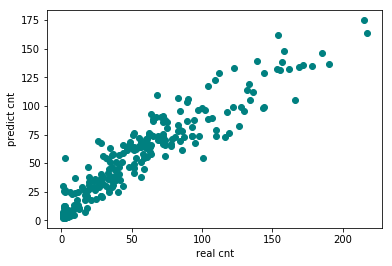

  mean_absolute_error: 12.578
  随机森林模型下，本月各因子的重要程度如下：
   1) hr              0.704259 
   2) workingday      0.086115 
   3) hum             0.059413 
   4) atemp           0.040382 
   5) temp            0.034371 
   6) weekday         0.026016 
   7) weathersit      0.025398 
   8) windspeed       0.023257 
   9) holiday         0.000787 
  10) mnth            0.000000 
  11) yr              0.000000 
  12) season          0.000000 


月份数据：2011-2
train score: 0.905, test score: 0.750


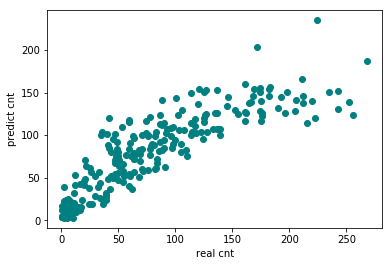

  mean_absolute_error: 22.686
  随机森林模型下，本月各因子的重要程度如下：
   1) hr              0.587717 
   2) temp            0.126721 
   3) hum             0.071700 
   4) atemp           0.070024 
   5) windspeed       0.052712 
   6) weekday         0.037040 
   7) workingday      0.034870 
   8) weathersit      0.017060 
   9) holiday         0.002156 
  10) mnth            0.000000 
  11) yr              0.000000 
  12) season          0.000000 


月份数据：2011-3
train score: 0.914, test score: 0.790


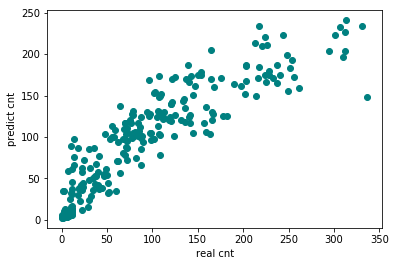

  mean_absolute_error: 26.788
  随机森林模型下，本月各因子的重要程度如下：
   1) hr              0.628404 
   2) hum             0.083376 
   3) atemp           0.079832 
   4) temp            0.076695 
   5) weathersit      0.036214 
   6) workingday      0.033726 
   7) windspeed       0.030429 
   8) weekday         0.025513 
   9) season          0.005812 
  10) holiday         0.000000 
  11) mnth            0.000000 
  12) yr              0.000000 


月份数据：2011-4
train score: 0.941, test score: 0.763


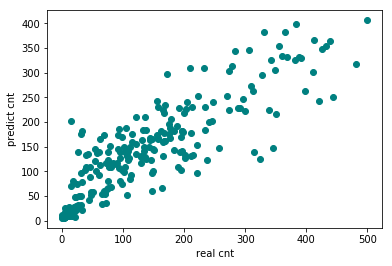

  mean_absolute_error: 39.732
  随机森林模型下，本月各因子的重要程度如下：
   1) hr              0.525932 
   2) temp            0.110238 
   3) atemp           0.104432 
   4) hum             0.102863 
   5) weekday         0.054059 
   6) windspeed       0.035466 
   7) weathersit      0.032175 
   8) workingday      0.031248 
   9) holiday         0.003588 
  10) mnth            0.000000 
  11) yr              0.000000 
  12) season          0.000000 


月份数据：2011-5
train score: 0.953, test score: 0.857


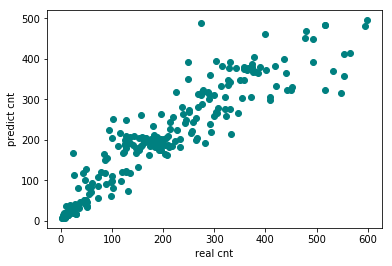

  mean_absolute_error: 37.350
  随机森林模型下，本月各因子的重要程度如下：
   1) hr              0.647294 
   2) atemp           0.122305 
   3) hum             0.069049 
   4) workingday      0.054337 
   5) weekday         0.032704 
   6) temp            0.031823 
   7) windspeed       0.030534 
   8) weathersit      0.010401 
   9) holiday         0.001553 
  10) mnth            0.000000 
  11) yr              0.000000 
  12) season          0.000000 


月份数据：2011-6
train score: 0.967, test score: 0.888


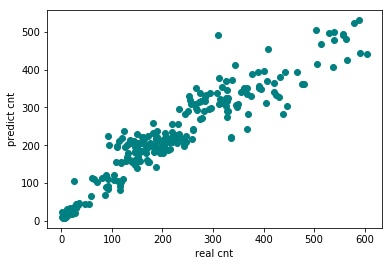

  mean_absolute_error: 35.718
  随机森林模型下，本月各因子的重要程度如下：
   1) hr              0.685878 
   2) temp            0.098245 
   3) hum             0.054412 
   4) workingday      0.050800 
   5) atemp           0.037309 
   6) weekday         0.033438 
   7) windspeed       0.027288 
   8) weathersit      0.009888 
   9) season          0.002742 
  10) holiday         0.000000 
  11) mnth            0.000000 
  12) yr              0.000000 


月份数据：2011-7
train score: 0.947, test score: 0.876


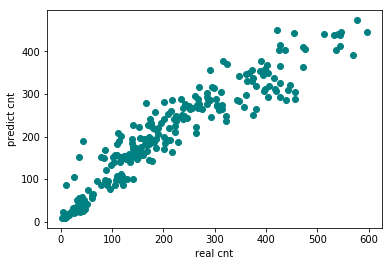

  mean_absolute_error: 36.850
  随机森林模型下，本月各因子的重要程度如下：
   1) hr              0.665191 
   2) hum             0.109320 
   3) workingday      0.050914 
   4) temp            0.049904 
   5) atemp           0.045583 
   6) weekday         0.032793 
   7) windspeed       0.029917 
   8) holiday         0.009555 
   9) weathersit      0.006822 
  10) mnth            0.000000 
  11) yr              0.000000 
  12) season          0.000000 


月份数据：2011-8
train score: 0.966, test score: 0.811


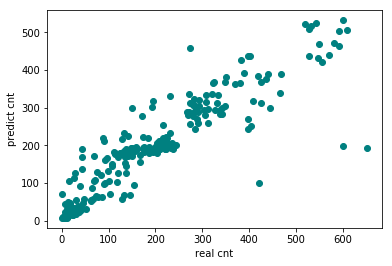

  mean_absolute_error: 40.219
  随机森林模型下，本月各因子的重要程度如下：
   1) hr              0.689766 
   2) temp            0.089154 
   3) hum             0.085309 
   4) workingday      0.048133 
   5) atemp           0.031666 
   6) weekday         0.025974 
   7) windspeed       0.023159 
   8) weathersit      0.006840 
   9) holiday         0.000000 
  10) mnth            0.000000 
  11) yr              0.000000 
  12) season          0.000000 


月份数据：2011-9
train score: 0.942, test score: 0.802


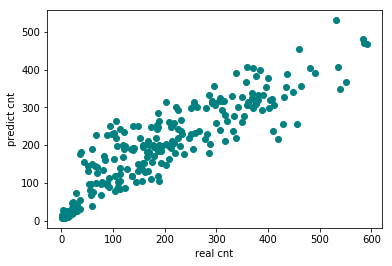

  mean_absolute_error: 46.501
  随机森林模型下，本月各因子的重要程度如下：
   1) hr              0.628751 
   2) hum             0.108419 
   3) atemp           0.062907 
   4) temp            0.060210 
   5) workingday      0.035368 
   6) weathersit      0.030659 
   7) windspeed       0.030182 
   8) weekday         0.029563 
   9) season          0.009630 
  10) holiday         0.004311 
  11) mnth            0.000000 
  12) yr              0.000000 


月份数据：2011-10
train score: 0.935, test score: 0.871


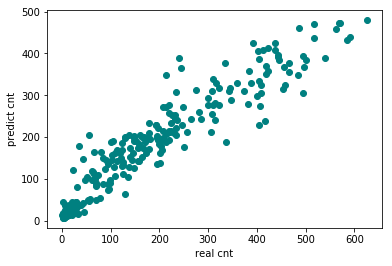

  mean_absolute_error: 39.147
  随机森林模型下，本月各因子的重要程度如下：
   1) hr              0.611716 
   2) hum             0.167887 
   3) atemp           0.049608 
   4) temp            0.046995 
   5) workingday      0.043728 
   6) weekday         0.031733 
   7) windspeed       0.028025 
   8) weathersit      0.019646 
   9) holiday         0.000661 
  10) mnth            0.000000 
  11) yr              0.000000 
  12) season          0.000000 


月份数据：2011-11
train score: 0.905, test score: 0.774


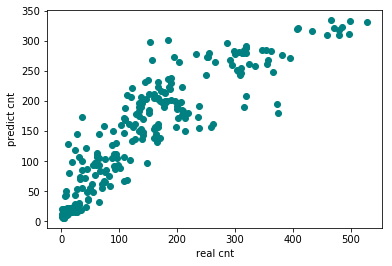

  mean_absolute_error: 41.723
  随机森林模型下，本月各因子的重要程度如下：
   1) hr              0.635660 
   2) hum             0.094071 
   3) temp            0.062614 
   4) atemp           0.049758 
   5) weekday         0.042203 
   6) workingday      0.039578 
   7) weathersit      0.032759 
   8) windspeed       0.030742 
   9) holiday         0.012616 
  10) mnth            0.000000 
  11) yr              0.000000 
  12) season          0.000000 


月份数据：2011-12
train score: 0.926, test score: 0.781


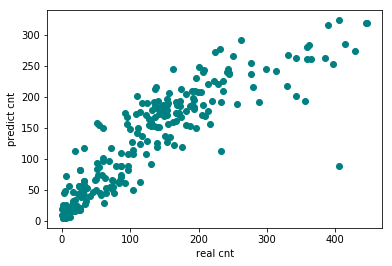

  mean_absolute_error: 32.903
  随机森林模型下，本月各因子的重要程度如下：
   1) hr              0.566619 
   2) season          0.085832 
   3) hum             0.080955 
   4) weathersit      0.053516 
   5) workingday      0.049695 
   6) temp            0.048213 
   7) atemp           0.048202 
   8) windspeed       0.033788 
   9) weekday         0.032195 
  10) holiday         0.000986 
  11) mnth            0.000000 
  12) yr              0.000000 


月份数据：2012-1
train score: 0.918, test score: 0.801


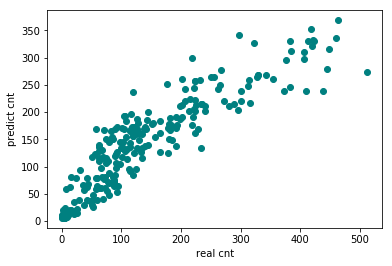

  mean_absolute_error: 37.251
  随机森林模型下，本月各因子的重要程度如下：
   1) hr              0.657421 
   2) atemp           0.073482 
   3) temp            0.073285 
   4) workingday      0.053749 
   5) hum             0.052646 
   6) weekday         0.036376 
   7) windspeed       0.026822 
   8) weathersit      0.024816 
   9) holiday         0.001402 
  10) mnth            0.000000 
  11) yr              0.000000 
  12) season          0.000000 


月份数据：2012-2
train score: 0.915, test score: 0.806


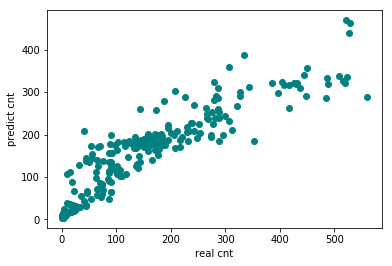

  mean_absolute_error: 40.753
  随机森林模型下，本月各因子的重要程度如下：
   1) hr              0.630055 
   2) atemp           0.083940 
   3) temp            0.076228 
   4) hum             0.071746 
   5) workingday      0.046849 
   6) windspeed       0.043566 
   7) weekday         0.031099 
   8) weathersit      0.016039 
   9) holiday         0.000480 
  10) mnth            0.000000 
  11) yr              0.000000 
  12) season          0.000000 


月份数据：2012-3
train score: 0.940, test score: 0.825


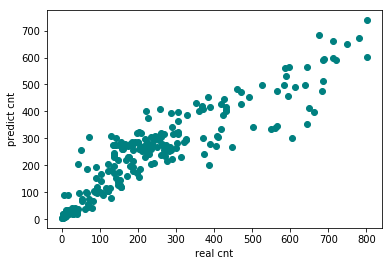

  mean_absolute_error: 57.058
  随机森林模型下，本月各因子的重要程度如下：
   1) hr              0.649639 
   2) atemp           0.105756 
   3) temp            0.086237 
   4) hum             0.047184 
   5) workingday      0.032746 
   6) weekday         0.026668 
   7) windspeed       0.026222 
   8) weathersit      0.016637 
   9) season          0.008912 
  10) holiday         0.000000 
  11) mnth            0.000000 
  12) yr              0.000000 


月份数据：2012-4
train score: 0.930, test score: 0.821


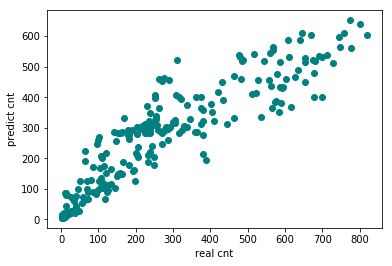

  mean_absolute_error: 66.277
  随机森林模型下，本月各因子的重要程度如下：
   1) hr              0.656345 
   2) temp            0.081033 
   3) atemp           0.072435 
   4) hum             0.062077 
   5) weekday         0.034463 
   6) workingday      0.034449 
   7) weathersit      0.031199 
   8) windspeed       0.025453 
   9) holiday         0.002546 
  10) mnth            0.000000 
  11) yr              0.000000 
  12) season          0.000000 


月份数据：2012-5
train score: 0.955, test score: 0.873


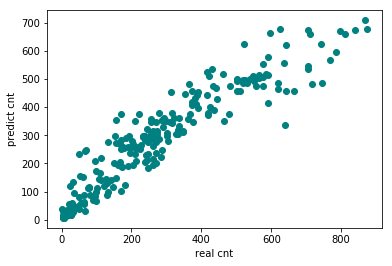

  mean_absolute_error: 53.948
  随机森林模型下，本月各因子的重要程度如下：
   1) hr              0.628405 
   2) atemp           0.117730 
   3) hum             0.083283 
   4) weekday         0.046896 
   5) workingday      0.041866 
   6) temp            0.034345 
   7) windspeed       0.025361 
   8) weathersit      0.021415 
   9) holiday         0.000700 
  10) mnth            0.000000 
  11) yr              0.000000 
  12) season          0.000000 


月份数据：2012-6
train score: 0.962, test score: 0.901


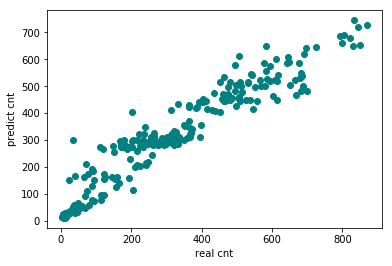

  mean_absolute_error: 50.503
  随机森林模型下，本月各因子的重要程度如下：
   1) hr              0.668787 
   2) hum             0.121411 
   3) workingday      0.058559 
   4) atemp           0.043685 
   5) weekday         0.031694 
   6) windspeed       0.028043 
   7) temp            0.025483 
   8) weathersit      0.017810 
   9) season          0.004528 
  10) holiday         0.000000 
  11) mnth            0.000000 
  12) yr              0.000000 


月份数据：2012-7
train score: 0.961, test score: 0.880


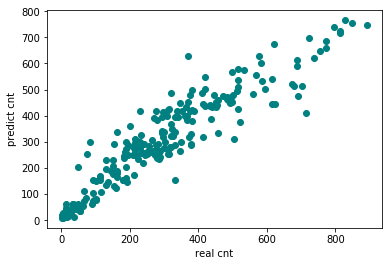

  mean_absolute_error: 50.922
  随机森林模型下，本月各因子的重要程度如下：
   1) hr              0.685906 
   2) workingday      0.076724 
   3) temp            0.068742 
   4) hum             0.057757 
   5) atemp           0.047432 
   6) weekday         0.032060 
   7) windspeed       0.018376 
   8) weathersit      0.007188 
   9) holiday         0.005816 
  10) mnth            0.000000 
  11) yr              0.000000 
  12) season          0.000000 


月份数据：2012-8
train score: 0.973, test score: 0.923


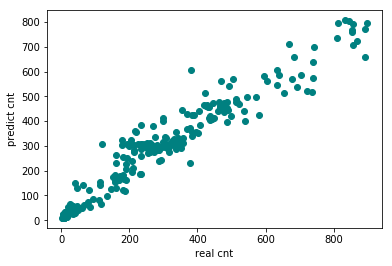

  mean_absolute_error: 42.274
  随机森林模型下，本月各因子的重要程度如下：
   1) hr              0.672768 
   2) hum             0.119709 
   3) temp            0.062909 
   4) workingday      0.049030 
   5) weekday         0.036421 
   6) windspeed       0.026185 
   7) atemp           0.024328 
   8) weathersit      0.008650 
   9) holiday         0.000000 
  10) mnth            0.000000 
  11) yr              0.000000 
  12) season          0.000000 


月份数据：2012-9
train score: 0.970, test score: 0.885


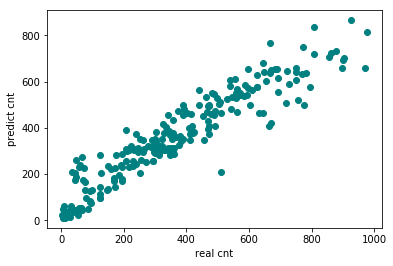

  mean_absolute_error: 57.715
  随机森林模型下，本月各因子的重要程度如下：
   1) hr              0.645717 
   2) hum             0.122066 
   3) workingday      0.072741 
   4) atemp           0.061770 
   5) windspeed       0.033398 
   6) weekday         0.029680 
   7) temp            0.022727 
   8) weathersit      0.008866 
   9) season          0.002465 
  10) holiday         0.000569 
  11) mnth            0.000000 
  12) yr              0.000000 


月份数据：2012-10
train score: 0.955, test score: 0.875


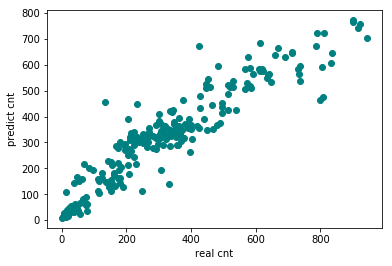

  mean_absolute_error: 55.888
  随机森林模型下，本月各因子的重要程度如下：
   1) hr              0.651605 
   2) hum             0.114402 
   3) workingday      0.056875 
   4) weekday         0.050688 
   5) atemp           0.046284 
   6) temp            0.037188 
   7) windspeed       0.026117 
   8) weathersit      0.016041 
   9) holiday         0.000800 
  10) mnth            0.000000 
  11) yr              0.000000 
  12) season          0.000000 


月份数据：2012-11
train score: 0.933, test score: 0.834


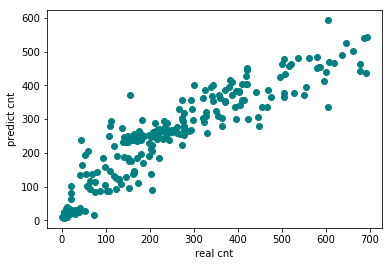

  mean_absolute_error: 53.263
  随机森林模型下，本月各因子的重要程度如下：
   1) hr              0.637828 
   2) atemp           0.087611 
   3) temp            0.083715 
   4) hum             0.061630 
   5) workingday      0.056866 
   6) weekday         0.029114 
   7) windspeed       0.024518 
   8) weathersit      0.011740 
   9) holiday         0.006977 
  10) mnth            0.000000 
  11) yr              0.000000 
  12) season          0.000000 


月份数据：2012-12
train score: 0.931, test score: 0.804


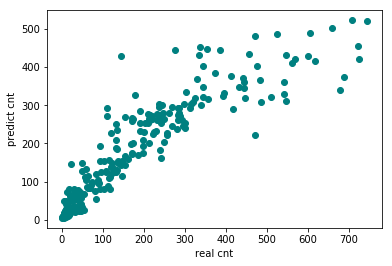

  mean_absolute_error: 47.938
  随机森林模型下，本月各因子的重要程度如下：
   1) hr              0.556694 
   2) season          0.126803 
   3) temp            0.069568 
   4) atemp           0.068845 
   5) hum             0.058076 
   6) workingday      0.035080 
   7) weathersit      0.029829 
   8) weekday         0.028742 
   9) windspeed       0.024885 
  10) holiday         0.001478 
  11) mnth            0.000000 
  12) yr              0.000000 




In [480]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
random_seed = 2
# 随机选十个做测试集

for year in range(0,2):
#     print('此时应用的是' + str(2011+year) + '年的数据')
    for month in range(1,13):
        print('月份数据：{}-{}'.format(str(2011+year),str(month)))
        df_month = df[(df['yr'] == year) & (df['mnth'] == month)]
        df_month = df_month[['season', 'yr', 'mnth','hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt']]
#         print(len(df_month))
        df_X = df_month.iloc[:,:12]
        df_Y = df_month.iloc[:,14]
#         print(df_X.columns)
 
        # 此处更改选择列数即可选择预测casual，registered和cnt。
        X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=250,random_state=random_seed)
        # 选择每月最后250个小时点做测试集
        
        rfr = RandomForestRegressor(n_estimators=300,max_features=8, max_depth=8, random_state=random_seed)
        rfr.fit(X_train, y_train)
        pred = rfr.predict(X_test)
        print('train score: {0:.3f}, test score: {1:.3f}'.format(rfr.score(X_train,y_train), rfr.score(X_test, y_test)))
        plt.scatter (y_test,pred,color='teal')
#         画出预测值和真实值的散点图
        plt.xlabel('real cnt')
        plt.ylabel('predict cnt')
        plt.show()
    
        print('  mean_absolute_error: {0:.3f}'.format(metrics.mean_absolute_error(pred,y_test)))
        
        importances = rfr.feature_importances_
        indices = np.argsort(importances)[::-1]  # 逆序输出
        feat_labels = df_X.columns[:]
        
        print('  随机森林模型下，本月各因子的重要程度如下：')
        for f in range(X_train.shape[1]):
            print("  %2d) %-*s %f " % (f + 1, 15, feat_labels[indices[f]], importances[indices[f]]))
        print('\n')
        
        

可以显著看出，在任何一个月份中，hr的重要性基本都是最强的，其次为weathersit,windspeed,hum,atemp等天气原因及是否为工作日。

由于我们是每个月单独进行随机森林，所以yr,mnth,hr基本都是没有特征的，所以因子重要程度都接近于0.

## Step 2
“casual” means some users did not register and just rent the bike occasionally.
Treat “casual” as Y and do the same as in step 1. What can you say about the
prediction of “casual”?

## Treat “casual” as the response Y （随机森林）

数据：2011-1
train score: 0.813, test score: 0.638


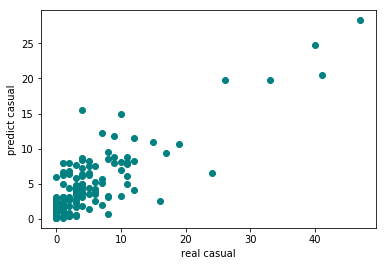

  mean_absolute_error: 2.913
  随机森林模型下，本月各因子的重要程度如下：
   1) hr              0.352918
   2) temp            0.239225
   3) hum             0.110068
   4) atemp           0.085711
   5) workingday      0.084863
   6) weekday         0.068612
   7) windspeed       0.046241
   8) weathersit      0.006416
   9) holiday         0.005946
  10) mnth            0.000000
  11) yr              0.000000
  12) season          0.000000
数据：2011-2
train score: 0.895, test score: 0.800


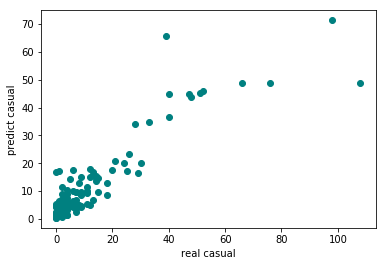

  mean_absolute_error: 4.162
  随机森林模型下，本月各因子的重要程度如下：
   1) temp            0.271471
   2) hr              0.213127
   3) atemp           0.139120
   4) hum             0.103859
   5) workingday      0.102910
   6) windspeed       0.089384
   7) weekday         0.070267
   8) weathersit      0.006420
   9) holiday         0.003443
  10) mnth            0.000000
  11) yr              0.000000
  12) season          0.000000
数据：2011-3
train score: 0.925, test score: 0.748


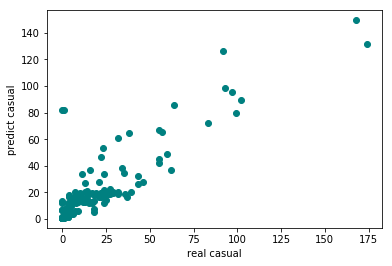

  mean_absolute_error: 8.336
  随机森林模型下，本月各因子的重要程度如下：
   1) hum             0.222125
   2) hr              0.194283
   3) temp            0.160952
   4) atemp           0.154114
   5) workingday      0.131028
   6) windspeed       0.056026
   7) weekday         0.054777
   8) weathersit      0.024199
   9) season          0.002496
  10) holiday         0.000000
  11) mnth            0.000000
  12) yr              0.000000
数据：2011-4
train score: 0.936, test score: 0.793


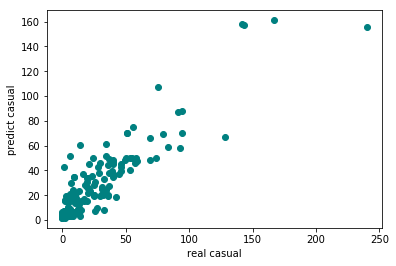

  mean_absolute_error: 10.584
  随机森林模型下，本月各因子的重要程度如下：
   1) hr              0.379736
   2) workingday      0.190067
   3) hum             0.142108
   4) weekday         0.089720
   5) atemp           0.075533
   6) temp            0.068038
   7) weathersit      0.022417
   8) windspeed       0.019926
   9) holiday         0.012456
  10) mnth            0.000000
  11) yr              0.000000
  12) season          0.000000
数据：2011-5
train score: 0.931, test score: 0.878


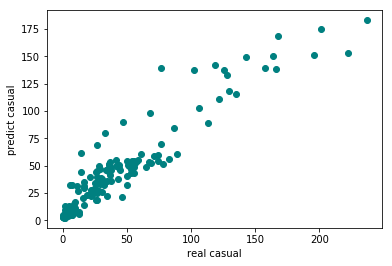

  mean_absolute_error: 10.949
  随机森林模型下，本月各因子的重要程度如下：
   1) hr              0.399311
   2) workingday      0.267120
   3) atemp           0.147501
   4) temp            0.065504
   5) weekday         0.052005
   6) hum             0.044896
   7) windspeed       0.016187
   8) holiday         0.004098
   9) weathersit      0.003377
  10) mnth            0.000000
  11) yr              0.000000
  12) season          0.000000
数据：2011-6
train score: 0.947, test score: 0.879


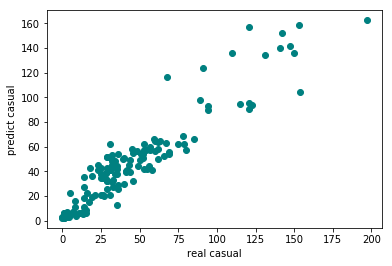

  mean_absolute_error: 9.658
  随机森林模型下，本月各因子的重要程度如下：
   1) hr              0.516746
   2) workingday      0.243500
   3) temp            0.102589
   4) weekday         0.064820
   5) hum             0.036652
   6) atemp           0.021704
   7) windspeed       0.009634
   8) season          0.002582
   9) weathersit      0.001773
  10) holiday         0.000000
  11) mnth            0.000000
  12) yr              0.000000
数据：2011-7
train score: 0.907, test score: 0.869


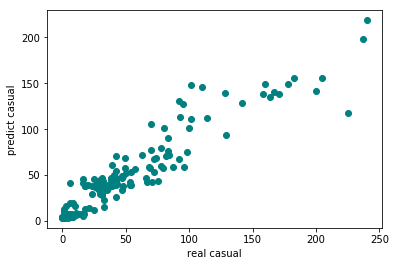

  mean_absolute_error: 12.572
  随机森林模型下，本月各因子的重要程度如下：
   1) hr              0.428233
   2) workingday      0.255777
   3) hum             0.120660
   4) holiday         0.059321
   5) atemp           0.056704
   6) temp            0.030812
   7) weekday         0.026118
   8) windspeed       0.017432
   9) weathersit      0.004942
  10) mnth            0.000000
  11) yr              0.000000
  12) season          0.000000
数据：2011-8
train score: 0.894, test score: 0.738


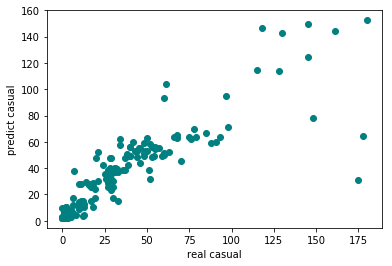

  mean_absolute_error: 10.927
  随机森林模型下，本月各因子的重要程度如下：
   1) hr              0.458324
   2) temp            0.182152
   3) workingday      0.153325
   4) hum             0.090547
   5) atemp           0.047040
   6) weekday         0.040163
   7) windspeed       0.019663
   8) weathersit      0.008785
   9) holiday         0.000000
  10) mnth            0.000000
  11) yr              0.000000
  12) season          0.000000
数据：2011-9
train score: 0.939, test score: 0.900


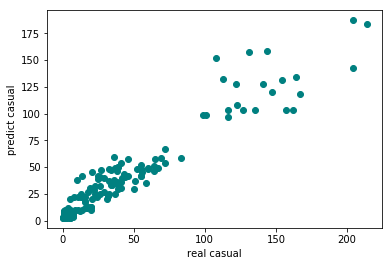

  mean_absolute_error: 10.468
  随机森林模型下，本月各因子的重要程度如下：
   1) atemp           0.230610
   2) hr              0.225838
   3) workingday      0.203968
   4) temp            0.166181
   5) hum             0.064735
   6) weekday         0.064044
   7) weathersit      0.017309
   8) windspeed       0.012020
   9) season          0.009304
  10) holiday         0.005990
  11) mnth            0.000000
  12) yr              0.000000
数据：2011-10
train score: 0.926, test score: 0.888


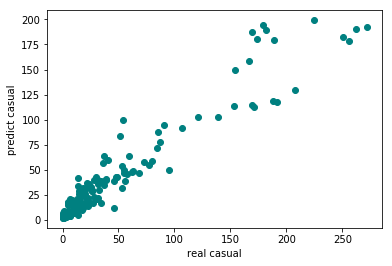

  mean_absolute_error: 12.414
  随机森林模型下，本月各因子的重要程度如下：
   1) hum             0.235362
   2) hr              0.219219
   3) atemp           0.210608
   4) workingday      0.199524
   5) temp            0.069007
   6) weekday         0.038123
   7) windspeed       0.015046
   8) holiday         0.007138
   9) weathersit      0.005972
  10) mnth            0.000000
  11) yr              0.000000
  12) season          0.000000
数据：2011-11
train score: 0.929, test score: 0.846


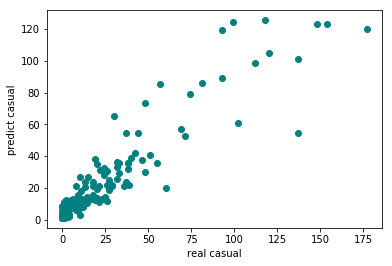

  mean_absolute_error: 8.111
  随机森林模型下，本月各因子的重要程度如下：
   1) hr              0.276156
   2) hum             0.271916
   3) weekday         0.136989
   4) workingday      0.093975
   5) atemp           0.092084
   6) temp            0.090769
   7) windspeed       0.025025
   8) weathersit      0.006973
   9) holiday         0.006113
  10) mnth            0.000000
  11) yr              0.000000
  12) season          0.000000
数据：2011-12
train score: 0.881, test score: 0.730


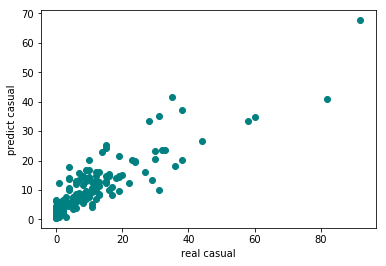

  mean_absolute_error: 4.660
  随机森林模型下，本月各因子的重要程度如下：
   1) hr              0.353464
   2) atemp           0.141957
   3) workingday      0.129850
   4) temp            0.126908
   5) hum             0.115062
   6) weekday         0.044153
   7) windspeed       0.040905
   8) season          0.026885
   9) weathersit      0.017398
  10) holiday         0.003418
  11) mnth            0.000000
  12) yr              0.000000
数据：2012-1
train score: 0.873, test score: 0.853


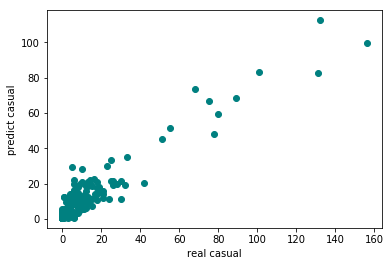

  mean_absolute_error: 5.844
  随机森林模型下，本月各因子的重要程度如下：
   1) hr              0.359656
   2) temp            0.177378
   3) workingday      0.139764
   4) atemp           0.130856
   5) weekday         0.103949
   6) hum             0.049679
   7) windspeed       0.026666
   8) weathersit      0.010066
   9) holiday         0.001986
  10) mnth            0.000000
  11) yr              0.000000
  12) season          0.000000
数据：2012-2
train score: 0.910, test score: 0.794


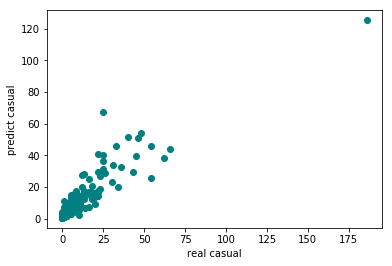

  mean_absolute_error: 5.144
  随机森林模型下，本月各因子的重要程度如下：
   1) hr              0.292442
   2) atemp           0.201248
   3) temp            0.160988
   4) workingday      0.111186
   5) weekday         0.083878
   6) hum             0.081379
   7) windspeed       0.060906
   8) weathersit      0.005120
   9) holiday         0.002853
  10) mnth            0.000000
  11) yr              0.000000
  12) season          0.000000
数据：2012-3
train score: 0.922, test score: 0.883


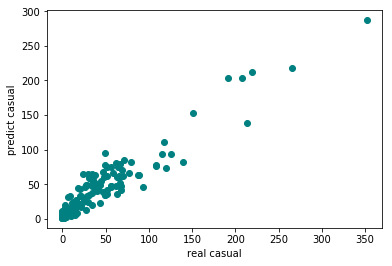

  mean_absolute_error: 12.379
  随机森林模型下，本月各因子的重要程度如下：
   1) hr              0.396963
   2) workingday      0.178417
   3) temp            0.140139
   4) atemp           0.128140
   5) weekday         0.053134
   6) hum             0.051738
   7) windspeed       0.019791
   8) season          0.019749
   9) weathersit      0.011929
  10) holiday         0.000000
  11) mnth            0.000000
  12) yr              0.000000
数据：2012-4
train score: 0.927, test score: 0.905


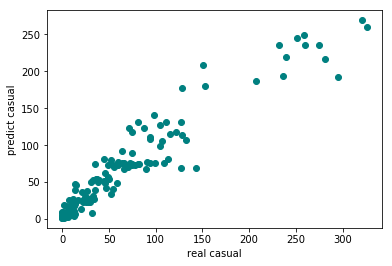

  mean_absolute_error: 14.669
  随机森林模型下，本月各因子的重要程度如下：
   1) hr              0.421991
   2) workingday      0.125491
   3) weekday         0.124583
   4) temp            0.115931
   5) hum             0.088040
   6) atemp           0.063019
   7) windspeed       0.024265
   8) weathersit      0.021270
   9) holiday         0.015408
  10) mnth            0.000000
  11) yr              0.000000
  12) season          0.000000
数据：2012-5
train score: 0.958, test score: 0.929


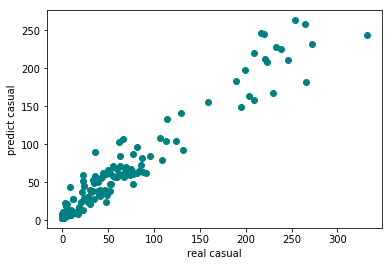

  mean_absolute_error: 13.025
  随机森林模型下，本月各因子的重要程度如下：
   1) atemp           0.281358
   2) workingday      0.226922
   3) hr              0.213702
   4) hum             0.098048
   5) weekday         0.079664
   6) temp            0.070409
   7) windspeed       0.018436
   8) weathersit      0.009338
   9) holiday         0.002122
  10) mnth            0.000000
  11) yr              0.000000
  12) season          0.000000
数据：2012-6
train score: 0.948, test score: 0.924


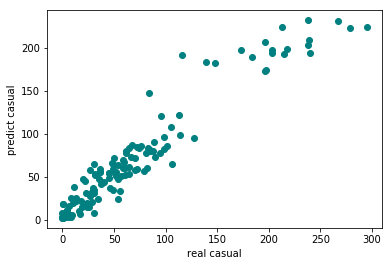

  mean_absolute_error: 12.944
  随机森林模型下，本月各因子的重要程度如下：
   1) hr              0.445961
   2) workingday      0.227350
   3) hum             0.155414
   4) weekday         0.065721
   5) atemp           0.058461
   6) temp            0.026469
   7) windspeed       0.011779
   8) season          0.006169
   9) weathersit      0.002675
  10) holiday         0.000000
  11) mnth            0.000000
  12) yr              0.000000
数据：2012-7
train score: 0.902, test score: 0.817


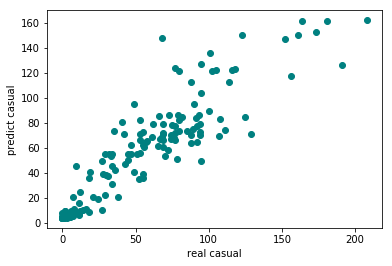

  mean_absolute_error: 13.484
  随机森林模型下，本月各因子的重要程度如下：
   1) hr              0.580602
   2) workingday      0.158615
   3) temp            0.088655
   4) hum             0.058518
   5) atemp           0.051699
   6) weekday         0.022668
   7) holiday         0.021008
   8) windspeed       0.013431
   9) weathersit      0.004804
  10) mnth            0.000000
  11) yr              0.000000
  12) season          0.000000
数据：2012-8
train score: 0.947, test score: 0.929


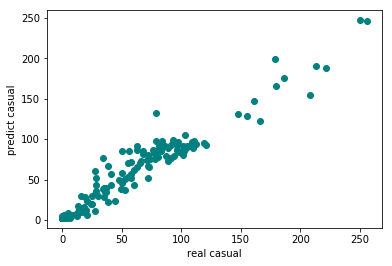

  mean_absolute_error: 9.935
  随机森林模型下，本月各因子的重要程度如下：
   1) hr              0.539321
   2) hum             0.179620
   3) weekday         0.093282
   4) workingday      0.076286
   5) temp            0.071246
   6) atemp           0.020276
   7) windspeed       0.017146
   8) weathersit      0.002824
   9) holiday         0.000000
  10) mnth            0.000000
  11) yr              0.000000
  12) season          0.000000
数据：2012-9
train score: 0.960, test score: 0.876


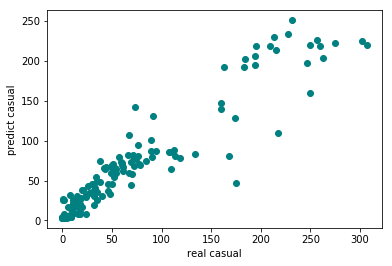

  mean_absolute_error: 16.891
  随机森林模型下，本月各因子的重要程度如下：
   1) hr              0.371129
   2) workingday      0.212612
   3) hum             0.154483
   4) atemp           0.145333
   5) weekday         0.061297
   6) temp            0.040070
   7) windspeed       0.010541
   8) weathersit      0.002353
   9) season          0.001654
  10) holiday         0.000528
  11) mnth            0.000000
  12) yr              0.000000
数据：2012-10
train score: 0.951, test score: 0.879


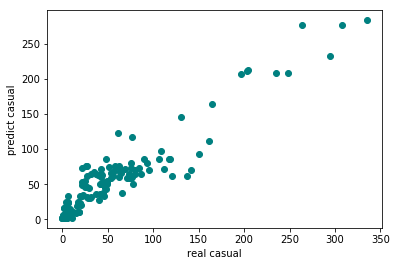

  mean_absolute_error: 15.536
  随机森林模型下，本月各因子的重要程度如下：
   1) hum             0.318033
   2) hr              0.218643
   3) weekday         0.155993
   4) workingday      0.126798
   5) atemp           0.078577
   6) temp            0.066884
   7) windspeed       0.031671
   8) weathersit      0.002787
   9) holiday         0.000615
  10) mnth            0.000000
  11) yr              0.000000
  12) season          0.000000
数据：2012-11
train score: 0.927, test score: 0.825


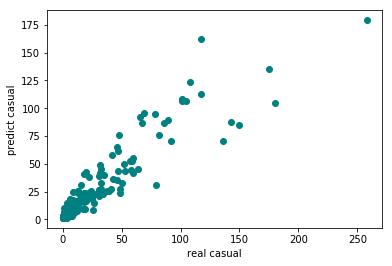

  mean_absolute_error: 10.051
  随机森林模型下，本月各因子的重要程度如下：
   1) temp            0.320190
   2) atemp           0.262293
   3) hum             0.129254
   4) hr              0.119308
   5) weekday         0.051038
   6) holiday         0.037786
   7) workingday      0.035898
   8) windspeed       0.031544
   9) weathersit      0.012689
  10) mnth            0.000000
  11) yr              0.000000
  12) season          0.000000
数据：2012-12
train score: 0.869, test score: 0.795


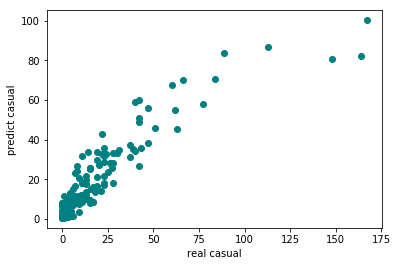

  mean_absolute_error: 6.864
  随机森林模型下，本月各因子的重要程度如下：
   1) hr              0.580163
   2) atemp           0.083486
   3) workingday      0.076595
   4) temp            0.072507
   5) weekday         0.061225
   6) hum             0.053361
   7) windspeed       0.030698
   8) season          0.024143
   9) weathersit      0.017090
  10) holiday         0.000733
  11) mnth            0.000000
  12) yr              0.000000


In [479]:
from sklearn.ensemble import RandomForestRegressor

random_seed = 2
# 随机选十个做测试集

for year in range(0,2):
#     print('此时应用的是' + str(2011+year) + '年的数据')
    for month in range(1,13):
        print('数据：{}-{}'.format(str(2011+year),str(month)))
        df_month = df[(df['yr'] == year) & (df['mnth'] == month)]
        df_month = df_month[['season', 'yr', 'mnth','hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt']]
#         print(len(df_month))
        df_X = df_month.iloc[:,:12]
        df_Y = df_month.iloc[:,12]
#         print(len(df_X))
#         print(len(df_Y))
 
        # 此处更改选择列数即可选择预测casual，registered和cnt。
        X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=0.2,random_state=random_seed)
        
        rfr = RandomForestRegressor(n_estimators=100,max_features=8, max_depth=6, random_state=random_seed)
        rfr.fit(X_train, y_train)
        pred = rfr.predict(X_test)
        print('train score: {0:.3f}, test score: {1:.3f}'.format(rfr.score(X_train,y_train), rfr.score(X_test, y_test)))
        plt.scatter (y_test,pred,color='teal')
#         画出预测值和真实值的散点图
        plt.xlabel('real casual')
        plt.ylabel('predict casual')
        plt.show()
    
        print('  mean_absolute_error: {0:.3f}'.format(metrics.mean_absolute_error(pred,y_test)))
        
        importances = rfr.feature_importances_
        indices = np.argsort(importances)[::-1]  # a[::-1]让a逆序输出
        feat_labels = df_X.columns[:]
        
        print('  随机森林模型下，本月各因子的重要程度如下：')
        for f in range(X_train.shape[1]):
            print("  %2d) %-*s %f" % (f + 1, 15, feat_labels[indices[f]], importances[indices[f]]))

由预测得分来看，用casual做Y值的预测结果得分也能达到很高的分数，基本每个月的得分都能达到0.80。

但是相对于注册用户。casual的用户对共享单车的使用频次普遍偏低。数量主要集中在小区间内，说明非注册用户可能对共享单车的好感度或者依赖程度远不如注册用户，注册用户可能更倾向于使用共享单车出行，而casual用户不然。

## Step 3. Examine the variation tendency of the “cnt” value, and its dependency on time
period of the day (e.g, morning, afternoon, evening, night), the week (weekdays,
weekends, or holidays), the season (spring, summer, fall, winter), and the year.
You shall produce more features using the time information, e.g, Monday morning, evening of the weekend in December, National Day of 2011, Hurricane Sandy
on 2012-10-30 (abnormal weather or event, the exact date and period for these
events can be found on the web). Use the new features you just produce to predict “cnt” again, and validate your models.

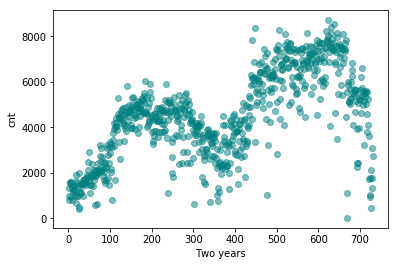

由图像可以看出很明显的变化规律，夏季和秋季，共享单车的使用频率明显升高，而在春季和冬季，单车使用率比较低。


In [224]:
plt.scatter (day_df['instant'],day_df['cnt'],color='teal',alpha=0.5)
plt.xlabel('Two years')
plt.ylabel('cnt')
plt.show()
print('由图像可以看出很明显的变化规律，夏季和秋季，共享单车的使用频率明显升高，而在春季和冬季，单车使用率比较低。')
# 画出两年来的cnt变化趋势

### Season

dict_keys([1, 2, 3, 4])
dict_values([150000, 347316, 419650, 326137])


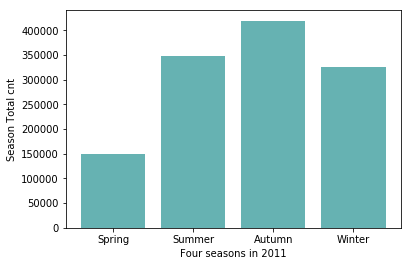

dict_keys([1, 2, 3, 4])
dict_values([321348, 571273, 641479, 515476])


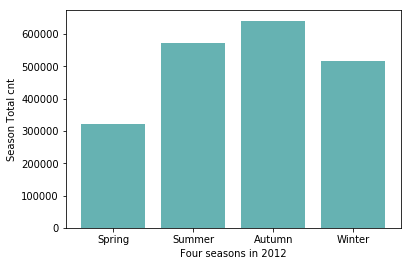

由图像可以看出，在2011和2012两年里面，共享单车的使用频次均表现为夏秋频次高，春冬频次低。


In [478]:
for year in [0,1]:
    df_201 = day_df[(day_df['yr'] == year)] # 2011,2012年
    stat_dict = {}

    for i in range(len(df_201)):
        if year == 0:
            j = i
        else:
            j = i+365
        season = df_201['season'][j]
        if season not in stat_dict.keys():
            stat_dict[season] = df_201['cnt'][j]
        else:
            stat_dict[season] += df_201['cnt'][j]

    print(stat_dict.keys())  
    print(stat_dict.values())  

    plt.bar(stat_dict.keys(),height=stat_dict.values(),color='teal',alpha=0.6)
    plt.xlabel('Four seasons in '+str(year+2011))
    plt.ylabel('Season Total cnt')
    plt.xticks([1,2,3,4], ['Spring','Summer','Autumn','Winter'])

    plt.show()

print('由图像可以看出，在2011和2012两年里面，共享单车的使用频次均表现为夏秋频次高，春冬频次低。')


### holiday

Holiday or not: [0, 1]
Total cnt [3417.129577464789, 3002.2]
[355, 10]


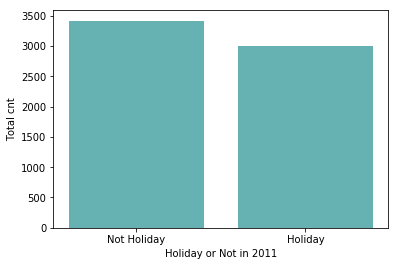

Holiday or not: [0, 1]
Total cnt [5637.078873239437, 4401.181818181818]
[355, 11]


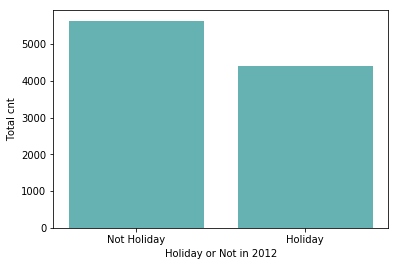

由图像可以看出，在2011和2012两年里面，共享单车在节假日的使用频次略低于非节假日。


In [481]:
for year in [0,1]:
    df_201 = day_df[(day_df['yr'] == year)] # 2011,2012年
    stat_dict_holiday = {}
    stat_list = [0,0]

    for i in range(len(df_201)):
        if year == 0:
            j = i
        else:
            j = i+365
        holiday = df_201['holiday'][j]
        if holiday not in stat_dict_holiday.keys():
            stat_dict_holiday[holiday] = df_201['cnt'][j]
            stat_list[holiday] = 1
        else:
            stat_dict_holiday[holiday] += df_201['cnt'][j]
            stat_list[holiday] += 1

    # 求个平均   
    for j in stat_dict_holiday.keys():
        stat_dict_holiday[j] = stat_dict_holiday[j]/stat_list[j]
        
    print('Holiday or not:',list(stat_dict_holiday.keys()))
    print('Total cnt',list(stat_dict_holiday.values()))
    print(stat_list)


    plt.bar(stat_dict_holiday.keys(),height=stat_dict_holiday.values(),color='teal',alpha=0.6)
    plt.xlabel('Holiday or Not in '+str(year+2011))
    plt.ylabel('Total cnt')
    plt.xticks([0,1], ['Not Holiday','Holiday'])
    plt.show()

print('由图像可以看出，在2011和2012两年里面，共享单车在节假日的使用频次略低于非节假日。')


### atemp & temp

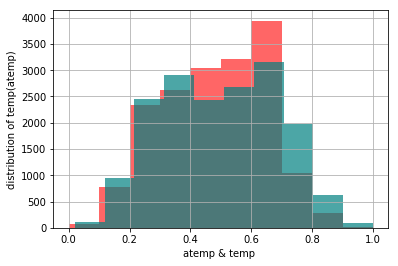

In [382]:
df['atemp'].hist(color='red',alpha=0.6)
df['temp'].hist(color='teal',alpha=0.7)
plt.xlabel('atemp & temp ')
plt.ylabel('distribution of temp(atemp)')
plt.show()

# temp是转化之后的温度数据

### hum

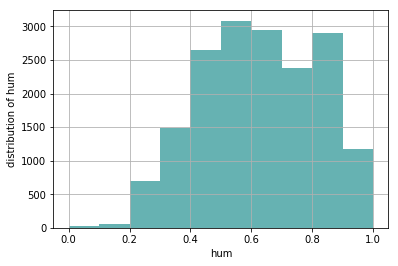

In [482]:
df['hum'].hist(color='teal',alpha=0.6)
plt.xlabel('hum')
plt.ylabel('distribution of hum')
plt.show()

### hr

Hours: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
Total cnt: [438, 295, 197, 94, 44, 106, 515, 1473, 3549, 2380, 1489, 1626, 2179, 2218, 2134, 2207, 2596, 4028, 3480, 2526, 1757, 1253, 951, 654]
Count: [29, 29, 27, 19, 23, 26, 28, 29, 29, 29, 29, 29, 30, 30, 30, 30, 31, 31, 30, 30, 30, 30, 30, 30]


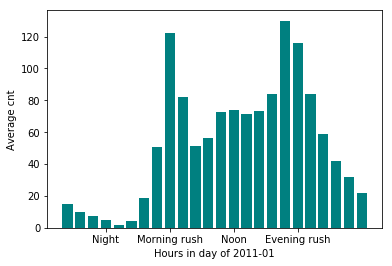

In [484]:
df_2011 = df[(df['yr'] == 0) & (df['mnth'] == 1)] # 选2011-01月进行观察研究
stat_dict_hr = {}
stat_list_hr = []
for i in range(len(df_2011)):

    hr = df_2011['hr'][i]
    if hr not in stat_dict_hr.keys():
        stat_dict_hr[hr] = df_2011['cnt'][i]
        stat_list_hr.append(1)
    else:
        stat_dict_hr[hr] += df_2011['cnt'][i]
        stat_list_hr[hr] += 1
        
print('Hours:',list(stat_dict_hr.keys()))  
print('Total cnt:',list(stat_dict_hr.values()))  
print('Count:',list(stat_list_hr))

# 求个平均   
for key in stat_dict_hr.keys():
    stat_dict_hr[key] = stat_dict_hr[key]/stat_list_hr[key]

plt.bar(stat_dict_hr.keys(),height=stat_dict_hr.values(),color='teal')
plt.xlabel('Hours in day of 2011-01')
plt.ylabel('Average cnt')
plt.xticks([3, 8, 13, 18], ['Night', 'Morning rush','Noon','Evening rush'])
plt.show()


由上图可以看出，在上下班早高峰和晚高峰的时候，共享单车的使用频次为日内的两个峰值。

日内的小时数是一个机器重要的特征。

### week

Weekdays: [0, 1, 2, 3, 4, 5, 6]
Total cnt: [4909, 6587, 5493, 4918, 5370, 5641, 5271]
Count: [117, 117, 80, 84, 79, 93, 118]


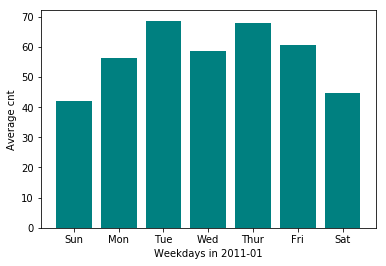

In [434]:
df_2011 = df[(df['yr'] == 0) & (df['mnth'] == 1)] # 选2011-01月进行观察研究
stat_dict_weekday = {}
stat_list_weekday = [0,0,0,0,0,0,0]


for i in range(len(df_2011)):
    
    weekday = df_2011['weekday'][i]
    if weekday not in stat_dict_weekday.keys():
        stat_dict_weekday[weekday] = df_2011['cnt'][i]
        stat_list_weekday[weekday] = 1
    else:
        stat_dict_weekday[weekday] += df_2011['cnt'][i]
        stat_list_weekday[weekday] += 1
        
print('Weekdays:',list(stat_dict_weekday.keys()))  
print('Total cnt:',list(stat_dict_weekday.values()))  
print('Count:',list(stat_list_weekday))

# 求个平均   
for key in stat_dict_weekday.keys():
    stat_dict_weekday[key] = stat_dict_weekday[key]/stat_list_weekday[key]

plt.bar(stat_dict_weekday.keys(),height=stat_dict_weekday.values(),color='teal')
plt.xlabel('Weekdays in 2011-01')
plt.ylabel('Average cnt')
plt.xticks([0,1,2,3,4,5,6], ['Sun','Mon', 'Tue','Wed','Thur','Fri','Sat'])
plt.show()

类似地，可以看出，工作日比周末，人们更愿意骑共享单车

### variation tendency of the “cnt” value

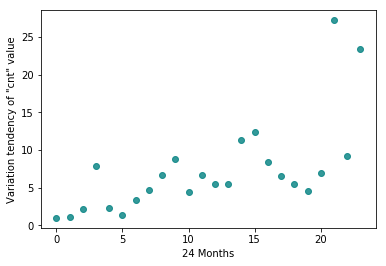

In [474]:
import numpy as np

random_seed = 2
# 随机选十个做测试集
month_variation = []
month_variation_std = []
for year in range(0,2):
    for month in range(1,13):
        df_month = day_df[(day_df['yr'] == year) & (day_df['mnth'] == month)]
        df_month = df_month['cnt']

        month_variation.append(np.var(df_month))

month_variation_std = [x/month_variation[0] for x in month_variation]
plt.scatter (range(0,24),month_variation_std,color='teal',alpha=0.8)
plt.xlabel('24 Months')
plt.ylabel('Variation tendency of "cnt" value')
plt.show()
# 画出两年来的cnt变化趋势
       

由图像可以看出，2011-2012两年之间，共享单车的租借数量方差整体为逐渐增大的趋势。

部分月份有严重的方差异常，后面我会在Event and Anomaly Detection中分析原因。

## Step 4

###  Event and Anomaly Detection
Count of rented bikes are also correlated to some events in the town which easily are traceable via search engines. For instance, query like “2012-10-30 washington d.c.” in Google returns related
results to Hurricane Sandy. Some of the important events are identified as fellow. Therefore the data can be used for validation of anomaly or event detection algorithms as well.We can find a way to do this anomaly detection?

[6778, 4639, 7572, 7328, 8156, 7965, 3510, 5478, 6392, 7691, 7570, 7282, 7109, 6639, 5875, 7534, 7461, 7509, 5424, 8090, 6824, 7058, 7466, 7693, 7359, 7444, 7852, 4459, 22, 1096, 5566]


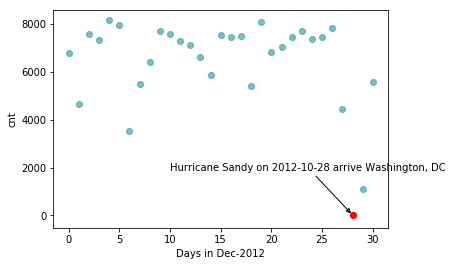

我们可以看到在2012-10-28当天，只有22个人租借了共享单车，由这一个数据就造成了大幅的波动。
[5191, 4649, 6234, 6606, 5729, 5375, 5008, 5582, 3228, 5170, 5501, 5319, 5532, 5611, 5047, 3786, 4585, 5557, 5267, 4128, 3623, 1749, 1787, 920, 1013, 441, 2114, 3095, 1341, 1796, 2729]


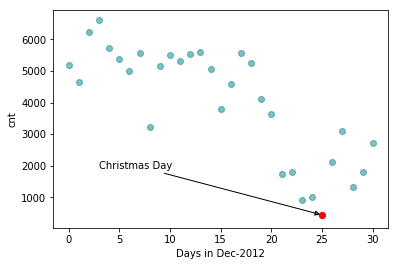

我们可以看到在2012-12-25圣诞节附近几天，并没有多少人租借共享单车，因为很多人会回家和家人团聚。
[2227, 2252, 3249, 3115, 1795, 2808, 3141, 1471, 2455, 2895, 3348, 2034, 2162, 3267, 3126, 795, 3744, 3429, 3204, 3944, 4189, 1683, 4036, 4191, 4073, 4400, 3872, 4058, 4595, 5312]


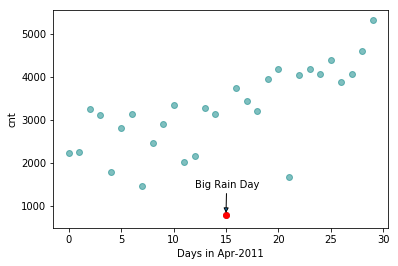

当天的天气状况为大雨天 3


In [400]:
df_month = day_df[(day_df['yr'] == 1) & (day_df['mnth'] == 10)]
df_month = df_month['cnt']
print([i for i in df_month])
fig, ax = plt.subplots()
plt.scatter(range(0,31),list(df_month),color='teal',alpha=0.5)
plt.scatter(28,22,color='r')
# 标出飓风登录华盛顿当天的异常情况
ax.annotate('Hurricane Sandy on 2012-10-28 arrive Washington, DC', xy=(28,22), xytext=(10,2000),arrowprops={'arrowstyle': '-|>'}, va='center')
plt.xlabel('Days in Dec-2012')
plt.ylabel('cnt')

plt.show()
print('我们可以看到在2012-10-28当天，只有22个人租借了共享单车，由这一个数据就造成了大幅的波动。')



df_month = day_df[(day_df['yr'] == 1) & (day_df['mnth'] == 12)]
df_month = df_month['cnt']
print([i for i in df_month])
fig, ax = plt.subplots()
plt.scatter(range(0,31),list(df_month),color='teal',alpha=0.5)
plt.scatter(25,441,color='r')
# 标出飓风登录华盛顿当天的异常情况
ax.annotate('Christmas Day', xy=(25,441), xytext=(3,2000),arrowprops={'arrowstyle': '-|>'}, va='center')
plt.xlabel('Days in Dec-2012')
plt.ylabel('cnt')

plt.show()
print('我们可以看到在2012-12-25圣诞节附近几天，并没有多少人租借共享单车，因为很多人会回家和家人团聚。')


df_month = day_df[(day_df['yr'] == 0) & (day_df['mnth'] == 4)]
df_month_cnt = df_month['cnt']
print([i for i in df_month_cnt])
fig, ax = plt.subplots()
plt.scatter(range(0,30),list(df_month_cnt),color='teal',alpha=0.5)
plt.scatter(15,795,color='r')
# 标出飓风登录华盛顿当天的异常情况
ax.annotate('Big Rain Day', xy=(15,795), xytext=(12,1500),arrowprops={'arrowstyle': '-|>'}, va='center')
plt.xlabel('Days in Apr-2011')
plt.ylabel('cnt')

plt.show()

print('当天的天气状况为大雨天',str(list(df_month['weathersit'])[15]))

In [359]:
print('两年只有三天被标记为weathersit为3的时刻，没有一天被标记为4')
df_month = df[(df['weathersit'] == 4)]
df_month_cnt = df_month['cnt']
df_month

两年只有三天被标记为weathersit为3的时刻，没有一天被标记为4


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
585,586,2011-01-26,1,0,1,16,0,3,1,4,0.22,0.1970,0.93,0.3284,1,35,36
8854,8855,2012-01-09,1,1,1,18,0,1,1,4,0.20,0.2273,0.86,0.0896,6,158,164
9123,9124,2012-01-21,1,1,1,1,0,6,0,4,0.14,0.1364,0.86,0.1940,1,22,23


## Step 5 Features Selection and Model Selection

From step 1,we know that 

特征重要性累计：
 {'atemp': 1.5753030810128286, 'windspeed': 0.7044475488235804, 'hum': 2.058761959766739, 'weekday': 0.8171312632242109, 'mnth': 0.0, 'hr': 15.318355998500653, 'yr': 0.0, 'workingday': 1.174046449588228, 'season': 0.24672290573112252, 'holiday': 0.056982030627328255, 'weathersit': 0.491606620548703, 'temp': 1.5566421421766077}


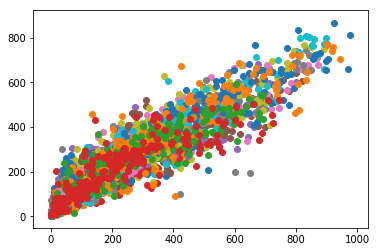

In [467]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
random_seed = 2
# 随机选十个做测试集
feature_dict = {'season':0, 'yr':0, 'mnth':0, 'hr':0, 'holiday':0, 'weekday':0, 'workingday':0,
       'weathersit':0, 'temp':0, 'atemp':0, 'hum':0, 'windspeed':0}




for year in range(0,2):
#     print('此时应用的是' + str(2011+year) + '年的数据')
    for month in range(1,13):
#         print('月份数据：{}-{}'.format(str(2011+year),str(month)))
        df_month = df[(df['yr'] == year) & (df['mnth'] == month)]
        df_month = df_month[['season', 'yr', 'mnth','hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt']]
#         print(len(df_month))
        df_X = df_month.iloc[:,:12]
        df_Y = df_month.iloc[:,14]
#         print(df_X.columns)
 
        # 此处更改选择列数即可选择预测casual，registered和cnt。
        X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=250,random_state=random_seed)
        # 选择每月最后250个小时点做测试集
        
        rfr = RandomForestRegressor(n_estimators=300,max_features=8, max_depth=8, random_state=random_seed)
        rfr.fit(X_train, y_train)
        pred = rfr.predict(X_test)
#         print('train score: {0:.3f}, test score: {1:.3f}'.format(rfr.score(X_train,y_train), rfr.score(X_test, y_test)))
        plt.scatter (y_test,pred)
#         画出预测值和真实值的散点图
#         plt.xlabel('real cnt')
#         plt.ylabel('predict cnt')
#         plt.show()
    
#         print('  mean_absolute_error: {0:.3f}'.format(metrics.mean_absolute_error(pred,y_test)))
        
        importances = rfr.feature_importances_
#         print(importances)
        indices = np.argsort(importances)[::-1]  # 逆序输出
        feat_labels = df_X.columns[:]
        
#         print('  随机森林模型下，本月各因子的重要程度如下：')
        for f in range(X_train.shape[1]):
#             print("  %2d) %-*s %f " % (f + 1, 15, feat_labels[indices[f]], importances[indices[f]]))
            fea_name = feat_labels[indices[f]]

            feature_dict[fea_name] = feature_dict[fea_name]+importances[indices[f]]
            
        
print('特征重要性累计：\n',feature_dict)
           
        

In [463]:
feature_dict

{'atemp': 1.5753030810128286,
 'holiday': 0.056982030627328255,
 'hr': 15.318355998500653,
 'hum': 2.058761959766739,
 'mnth': 0.0,
 'season': 0.24672290573112252,
 'temp': 1.5566421421766077,
 'weathersit': 0.491606620548703,
 'weekday': 0.8171312632242109,
 'windspeed': 0.7044475488235804,
 'workingday': 1.174046449588228,
 'yr': 0.0}

## Model evaluation

由两年的重要性程度之和，我们选用重要性较大的因子，即atemp，hr，hum，temp，workingday六个因子进行建模

月份数据：2011-1
train score: 0.962, test score: 0.853


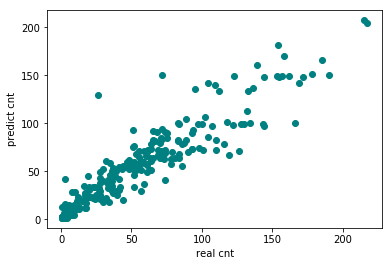

  mean_absolute_error: 11.716
  随机森林模型下，本月各因子的重要程度如下：
   1) hr              0.753021 
   2) workingday      0.155307 
   3) hum             0.036750 
   4) temp            0.028701 
   5) atemp           0.026221 


月份数据：2011-2
train score: 0.917, test score: 0.821


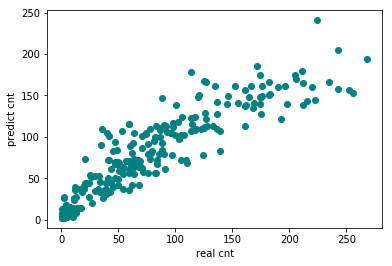

  mean_absolute_error: 19.171
  随机森林模型下，本月各因子的重要程度如下：
   1) hr              0.680317 
   2) temp            0.111430 
   3) hum             0.089737 
   4) workingday      0.063316 
   5) atemp           0.055200 


月份数据：2011-3
train score: 0.939, test score: 0.843


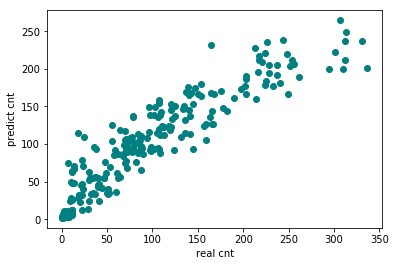

  mean_absolute_error: 22.818
  随机森林模型下，本月各因子的重要程度如下：
   1) hr              0.725464 
   2) hum             0.100504 
   3) workingday      0.067905 
   4) atemp           0.053277 
   5) temp            0.052850 


月份数据：2011-4
train score: 0.943, test score: 0.770


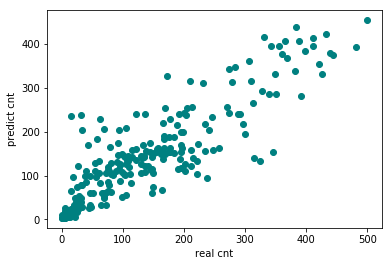

  mean_absolute_error: 38.350
  随机森林模型下，本月各因子的重要程度如下：
   1) hr              0.631395 
   2) hum             0.100577 
   3) atemp           0.100348 
   4) temp            0.098151 
   5) workingday      0.069530 


月份数据：2011-5
train score: 0.965, test score: 0.909


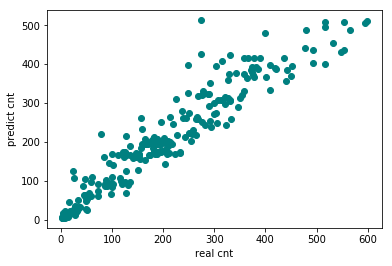

  mean_absolute_error: 30.365
  随机森林模型下，本月各因子的重要程度如下：
   1) hr              0.790665 
   2) workingday      0.093186 
   3) atemp           0.065916 
   4) hum             0.031588 
   5) temp            0.018645 


月份数据：2011-6
train score: 0.981, test score: 0.944


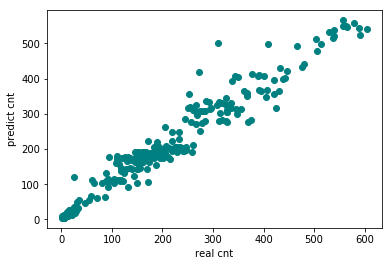

  mean_absolute_error: 24.883
  随机森林模型下，本月各因子的重要程度如下：
   1) hr              0.847439 
   2) workingday      0.090483 
   3) hum             0.026889 
   4) atemp           0.018610 
   5) temp            0.016579 


月份数据：2011-7
train score: 0.963, test score: 0.915


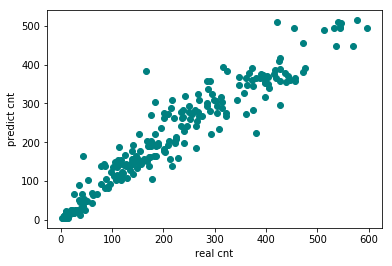

  mean_absolute_error: 30.122
  随机森林模型下，本月各因子的重要程度如下：
   1) hr              0.800784 
   2) workingday      0.082020 
   3) hum             0.043377 
   4) atemp           0.041214 
   5) temp            0.032606 


月份数据：2011-8
train score: 0.969, test score: 0.828


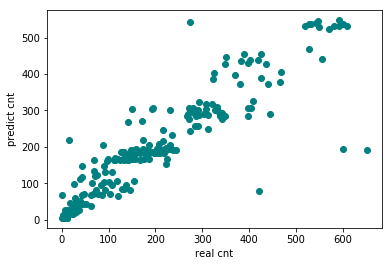

  mean_absolute_error: 36.467
  随机森林模型下，本月各因子的重要程度如下：
   1) hr              0.812381 
   2) workingday      0.078640 
   3) hum             0.077003 
   4) temp            0.019577 
   5) atemp           0.012399 


月份数据：2011-9
train score: 0.949, test score: 0.833


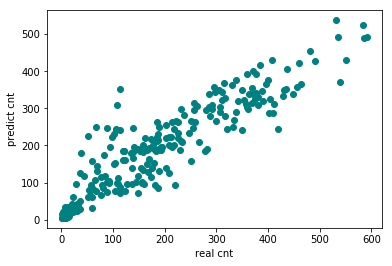

  mean_absolute_error: 41.998
  随机森林模型下，本月各因子的重要程度如下：
   1) hr              0.759049 
   2) hum             0.112545 
   3) workingday      0.063967 
   4) atemp           0.035625 
   5) temp            0.028814 


月份数据：2011-10
train score: 0.954, test score: 0.897


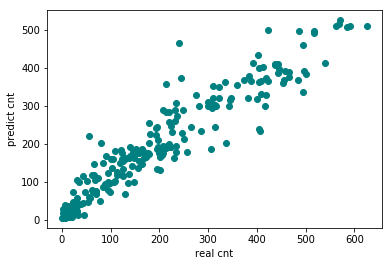

  mean_absolute_error: 34.347
  随机森林模型下，本月各因子的重要程度如下：
   1) hr              0.707054 
   2) hum             0.147395 
   3) workingday      0.070958 
   4) atemp           0.040527 
   5) temp            0.034067 


月份数据：2011-11
train score: 0.915, test score: 0.789


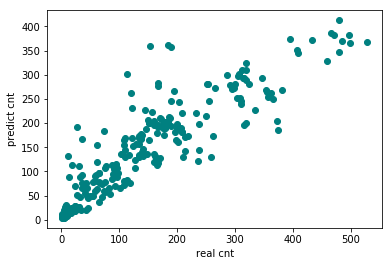

  mean_absolute_error: 38.175
  随机森林模型下，本月各因子的重要程度如下：
   1) hr              0.744733 
   2) workingday      0.087627 
   3) hum             0.081838 
   4) temp            0.051008 
   5) atemp           0.034794 


月份数据：2011-12
train score: 0.909, test score: 0.745


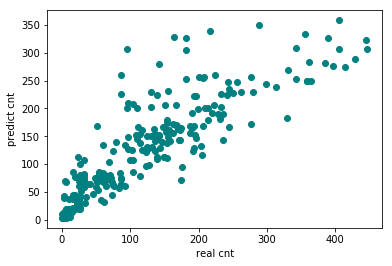

  mean_absolute_error: 36.415
  随机森林模型下，本月各因子的重要程度如下：
   1) hr              0.708347 
   2) hum             0.108495 
   3) workingday      0.078148 
   4) atemp           0.058680 
   5) temp            0.046331 


月份数据：2012-1
train score: 0.934, test score: 0.843


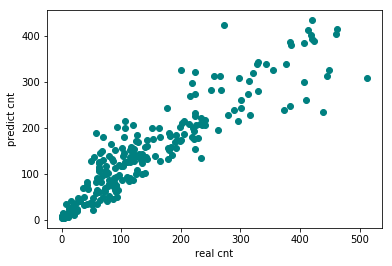

  mean_absolute_error: 31.291
  随机森林模型下，本月各因子的重要程度如下：
   1) hr              0.719348 
   2) workingday      0.098823 
   3) temp            0.080970 
   4) atemp           0.062749 
   5) hum             0.038110 


月份数据：2012-2
train score: 0.945, test score: 0.890


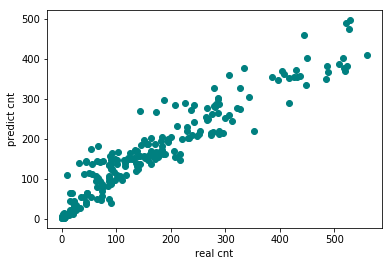

  mean_absolute_error: 30.889
  随机森林模型下，本月各因子的重要程度如下：
   1) hr              0.711324 
   2) workingday      0.093744 
   3) atemp           0.088776 
   4) hum             0.060141 
   5) temp            0.046014 


月份数据：2012-3
train score: 0.962, test score: 0.873


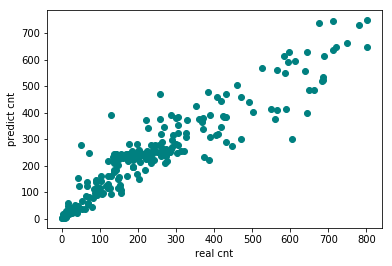

  mean_absolute_error: 46.591
  随机森林模型下，本月各因子的重要程度如下：
   1) hr              0.738641 
   2) temp            0.071218 
   3) atemp           0.069661 
   4) workingday      0.063013 
   5) hum             0.057467 


月份数据：2012-4
train score: 0.950, test score: 0.841


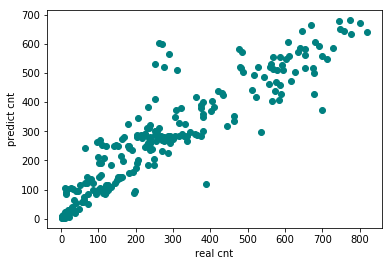

  mean_absolute_error: 59.338
  随机森林模型下，本月各因子的重要程度如下：
   1) hr              0.757336 
   2) workingday      0.072131 
   3) hum             0.067352 
   4) temp            0.055782 
   5) atemp           0.047399 


月份数据：2012-5
train score: 0.954, test score: 0.909


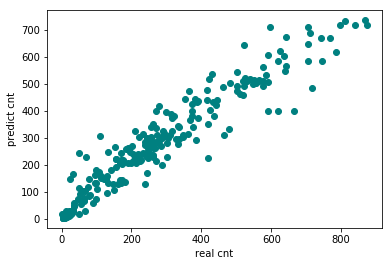

  mean_absolute_error: 44.450
  随机森林模型下，本月各因子的重要程度如下：
   1) hr              0.798922 
   2) hum             0.077751 
   3) workingday      0.075369 
   4) atemp           0.028826 
   5) temp            0.019132 


月份数据：2012-6
train score: 0.974, test score: 0.920


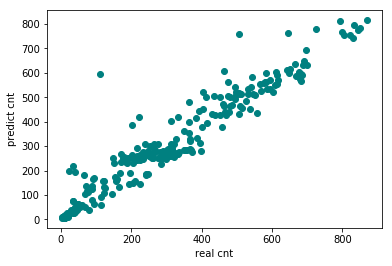

  mean_absolute_error: 42.473
  随机森林模型下，本月各因子的重要程度如下：
   1) hr              0.814602 
   2) workingday      0.097542 
   3) hum             0.049691 
   4) atemp           0.020548 
   5) temp            0.017616 


月份数据：2012-7
train score: 0.972, test score: 0.900


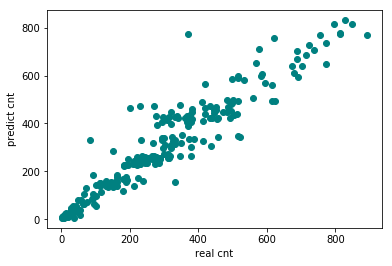

  mean_absolute_error: 41.632
  随机森林模型下，本月各因子的重要程度如下：
   1) hr              0.775815 
   2) workingday      0.152921 
   3) hum             0.031918 
   4) temp            0.020396 
   5) atemp           0.018950 


月份数据：2012-8
train score: 0.975, test score: 0.941


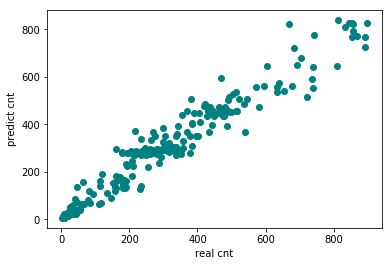

  mean_absolute_error: 37.725
  随机森林模型下，本月各因子的重要程度如下：
   1) hr              0.813746 
   2) workingday      0.098530 
   3) hum             0.044841 
   4) temp            0.027888 
   5) atemp           0.014996 


月份数据：2012-9
train score: 0.982, test score: 0.943


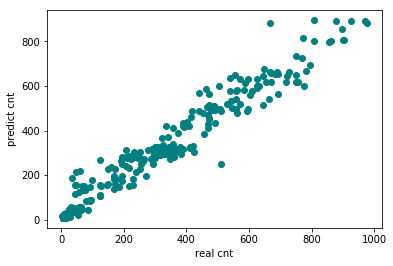

  mean_absolute_error: 43.063
  随机森林模型下，本月各因子的重要程度如下：
   1) hr              0.779952 
   2) workingday      0.123757 
   3) hum             0.073937 
   4) atemp           0.013079 
   5) temp            0.009276 


月份数据：2012-10
train score: 0.971, test score: 0.870


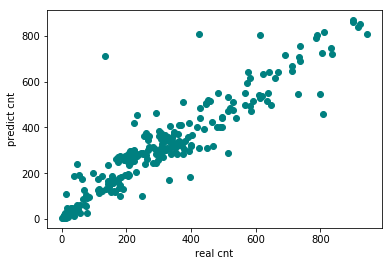

  mean_absolute_error: 51.995
  随机森林模型下，本月各因子的重要程度如下：
   1) hr              0.743280 
   2) workingday      0.118503 
   3) hum             0.076581 
   4) atemp           0.031481 
   5) temp            0.030154 


月份数据：2012-11
train score: 0.941, test score: 0.854


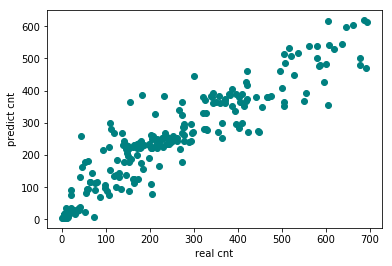

  mean_absolute_error: 48.518
  随机森林模型下，本月各因子的重要程度如下：
   1) hr              0.730067 
   2) workingday      0.095103 
   3) atemp           0.068194 
   4) temp            0.057304 
   5) hum             0.049332 


月份数据：2012-12
train score: 0.926, test score: 0.761


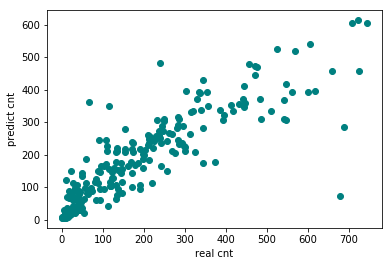

  mean_absolute_error: 51.454
  随机森林模型下，本月各因子的重要程度如下：
   1) hr              0.634459 
   2) atemp           0.154716 
   3) workingday      0.092092 
   4) hum             0.070589 
   5) temp            0.048145 




In [493]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
random_seed = 2
# 随机选十个做测试集

for year in range(0,2):
#     print('此时应用的是' + str(2011+year) + '年的数据')
    for month in range(1,13):
        print('月份数据：{}-{}'.format(str(2011+year),str(month)))
        df_month = df[(df['yr'] == year) & (df['mnth'] == month)]
        df_month = df_month[['hr', 'workingday', 'temp', 'atemp', 'hum', 'cnt']]
#         print(len(df_month))
        df_X = df_month.iloc[:,:5]
        df_Y = df_month.iloc[:,5]
#         print(df_X.columns)
 
        # 此处更改选择列数即可选择预测casual，registered和cnt。
        X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=250,random_state=random_seed)
        # 选择每月最后250个小时点做测试集
        
        rfr = RandomForestRegressor(n_estimators=300,max_features=5, max_depth=8, random_state=random_seed)
        rfr.fit(X_train, y_train)
        pred = rfr.predict(X_test)
        print('train score: {0:.3f}, test score: {1:.3f}'.format(rfr.score(X_train,y_train), rfr.score(X_test, y_test)))
        plt.scatter (y_test,pred,color='teal')
#         画出预测值和真实值的散点图
        plt.xlabel('real cnt')
        plt.ylabel('predict cnt')
        

        plt.show()
    
        print('  mean_absolute_error: {0:.3f}'.format(metrics.mean_absolute_error(pred,y_test)))
        
        importances = rfr.feature_importances_
        indices = np.argsort(importances)[::-1]  # 逆序输出
        feat_labels = df_X.columns[:]
        
        print('  随机森林模型下，本月各因子的重要程度如下：')
        for f in range(X_train.shape[1]):
            print("  %2d) %-*s %f " % (f + 1, 15, feat_labels[indices[f]], importances[indices[f]]))
        print('\n')
        
        

## Conclusion

由以上五个因子预测的得分和之前12各因子的效果基本等同，故我们的特征选择是有效的。

我们所构建的随机森林模型，在训练集上的得分均超过0.95，在训练集上也能基本保证0.8以上，部分月份甚至可以做到0.9的得分。

本project我们对数据按照月份进行训练集验证集的划分，然后对数据进行了探索与分析，由于原始数据已经是经过数据预处理之后的，故本project并未进行过多的数据预处理，后文对数据异常值进行了研究分析，然后，应用了随机森林回归对因子重要性进行了评估，并进行了因子选择，选出了atemp，hr，hum，temp，workingday六个因子用于最终的模型建构，最红的模型结果也是表现优异的